## Load data - Train Data & Test Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Train data 
train_data = pd.read_csv("train.csv")
train_label = pd.read_csv("train_label.csv", header=None)
train_data["Total_Booking"] = train_label
train_data_copy = train_data.copy()
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [3]:
# Test data 
test_data = pd.read_csv("test.csv")
test_label = pd.read_csv("test_label.csv", header=None)
test_data["Total_Booking"] = test_label
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [4]:
# test and train data size
print("Size of train data :",train_data.shape)
print("Size of test data  :",test_data.shape)

Size of train data : (8708, 10)
Size of test data  : (2178, 10)


## TASK 1: (1.) Visualize data and generate insights

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


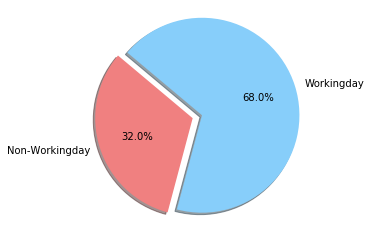

col_0,count by workingday
workingday,
0,2784
1,5924


In [5]:
#Plot Pie chart to understand Relationship between Working day and Total Booking

# Data to Plot 
workingday_tab = pd.crosstab(index=train_data['workingday'], columns='count by workingday')
labels = 'Non-Workingday', 'Workingday'
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(workingday_tab, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Relationship between Working day and Total Booking
workingday_tab

From the above Pie chart it is evident that the Cab demand is about 36% more on a Working Day compared to a Non- Working day

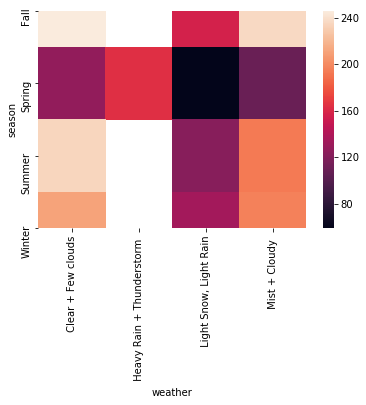

In [6]:
#Plot HeatMap to understand the influence of Seasons and Weather on the Average Booking

#Data to plot
seasonWeatherBooking = pd.pivot_table(train_data, values='Total_Booking', index='season', columns='weather')
#Plot
sns.heatmap(seasonWeatherBooking)

From the above heatmap, we understand that the average cab booking is the highest during 'Summer' and 'Fall' when the weather is 'Clear with Few clouds'. It goes high even when the weather is 'Misty and cloudy' during 'Fall'. 

## TASK 1: (2.) Outlier Analysis

### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Label Encoding weather and season column of train data
train_data['weather'] = le.fit_transform(train_data['weather'])
train_data['season'] = le.fit_transform(train_data['season'])

#Label Encoding weather and season column of test data
test_data['weather'] = le.fit_transform(test_data['weather'])
test_data['season'] = le.fit_transform(test_data['season'])

In [8]:
#Converting Datetime column to numerical form
import datetime as dt

#For Train Data
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['datetime'] = train_data['datetime'].map(dt.datetime.toordinal)

#For Test Data
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['datetime'] = test_data['datetime'].map(dt.datetime.toordinal)
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,734625,2,0,1,0,22.14,25.760,77,16.9979,504
1,734751,0,0,1,0,28.70,33.335,79,19.0012,5
2,734150,1,0,1,0,5.74,6.060,50,22.0028,139
3,734459,3,0,1,0,13.94,16.665,29,8.9981,209
4,734393,0,0,1,0,30.34,33.335,51,19.0012,184


### Feature selection using Embedded method (Lasso Model)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature Importance using Lasso Model')

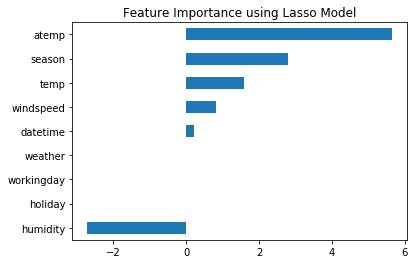

In [9]:
from sklearn.linear_model import LassoCV

X = train_data.drop(columns = ['Total_Booking'])
Y = train_data['Total_Booking']

#Performing Feature selection 
reg = LassoCV()
reg.fit(X,Y)
features = pd.Series(reg.coef_ , index = X.columns)

#Ploting the features in Decreasing order of their Coefficients 
important_features = features.sort_values()
important_features.plot(kind='barh')
plt.title("Feature Importance using Lasso Model")

From the above Feature importance analysis we can eliminate 'Working Day', 'Weather' and 'Holiday' for outlier analysis since their coefficients are zero. Also 'Season' is excluded since it being Label Encoded  and therefore will not have any outliers.

#### Method 1: IQR based Method (Box Plot)

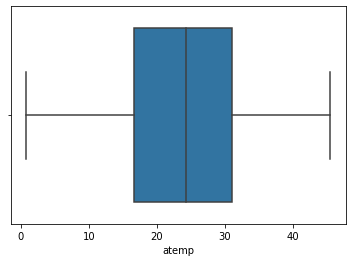

In [10]:
# Box Plot for 'atemp' column
sns.boxplot(x=train_data['atemp'])

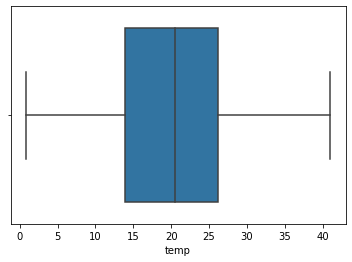

In [11]:
# Box Plot for 'temp' column
sns.boxplot(x=train_data['temp'])

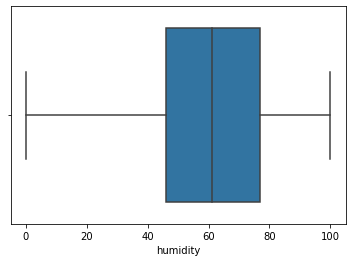

In [12]:
# Box Plot for 'humidity' column
sns.boxplot(x=train_data['humidity'])

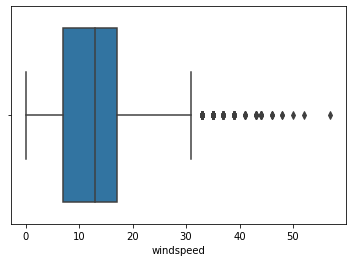

In [13]:
# Box Plot for 'windspeed' column
sns.boxplot(x=train_data['windspeed'])

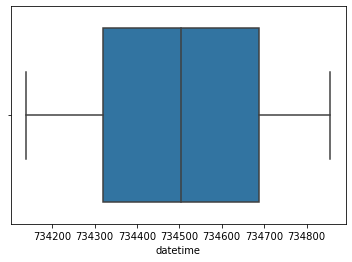

In [14]:
# Box Plot for 'datetime' column
sns.boxplot(x=train_data['datetime'])

From the above analysis we see there are outliers only in the windspeed column.


#### Method 2: Z-score Method 

In [15]:
from scipy import stats
z_score = pd.DataFrame(np.abs(stats.zscore(train_data['windspeed'])),columns = ['windspeed_z'])
z = z_score[z_score['windspeed_z'] > 2.5]
no_of_outliers = z.count()
print("The number of outliers in the 'windspeed' column: ", int(no_of_outliers))

The number of outliers in the 'windspeed' column:  112


## TASK 1: (3.) Missing value analysis

#### Method 1: Null Check 

In [16]:
train_data.isnull().any()

datetime         False
season           False
holiday          False
workingday       False
weather          False
temp             False
atemp            False
humidity         False
windspeed        False
Total_Booking    False
dtype: bool

isnull() returns a False for every column indicating the absence of any null values

#### Method 2: Checking for missing values

In [17]:
train_data.describe().round(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
count,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00
mean,734499.19,1.50,0.03,0.68,0.94,20.24,23.66,61.65,12.84,193.01
std,211.49,1.12,0.17,0.47,1.33,7.81,8.50,19.20,8.19,181.55
min,734138.00,0.00,0.00,0.00,0.00,0.82,0.76,0.00,0.00,1.00
25%,734319.00,0.00,0.00,0.00,0.00,13.94,16.66,46.00,7.00,43.00
50%,734505.00,2.00,0.00,1.00,0.00,20.50,24.24,61.00,13.00,148.00
75%,734687.00,3.00,0.00,1.00,3.00,26.24,31.06,77.00,17.00,286.00
max,734856.00,3.00,1.00,1.00,3.00,41.00,45.46,100.00,57.00,977.00


In [18]:
#Total number of entries in Train data
train_data.shape

(8708, 10)

The count row of describe() and the total number of entries in train_data matches indicating there are no missing values.

## TASK 1: (4.) Visualizing Total_Booking Vs other features 

[2 0 1 3]


col_0,count by season
season,
Fall,2189
Spring,2136
Summer,2197
Winter,2186


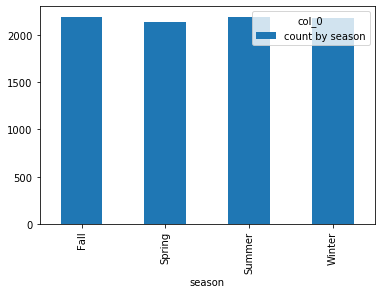

In [19]:
#Check unique values in 'season' column
print(train_data['season'].unique())

#Data to Plot
season_tab = pd.crosstab(index=train_data_copy['season'], columns='count by season')

# Bar Plot to understand season-wise Total_booking
season_tab.plot.bar()

season_tab

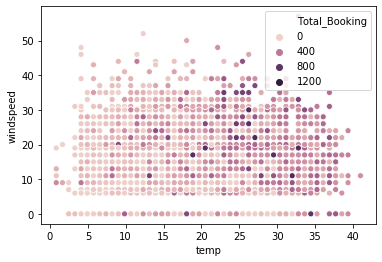

In [20]:
sns.scatterplot(x=train_data['temp'],y=train_data['windspeed'],hue=train_data['Total_Booking'])

Though not quite evident, we can see a trend wherein when the temperature is in the range 20-35 and windspeed in the range 20-40 the Total booking tends to be around 800 or more.

## TASK 1: (5.) Correlation Analysis

#### Method-1: Embedded Method using Lasso Model

This method has been executed earlier during feature selection and we had eliminated 'Workingday' and 'Holiday' columns.

#### Method-2: Pearon Correlation Method

In [21]:
# Checking for correlation between the target variable and other features using Pearson Method
X = np.abs(train_data.corr(method='pearson'))
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
datetime,1.000000,0.192286,0.010277,0.006173,0.016994,0.183744,0.184282,0.034716,0.092120,0.314940
season,0.192286,1.000000,0.007236,0.005784,0.060624,0.380153,0.346962,0.061593,0.006530,0.008503
holiday,0.010277,0.007236,1.000000,0.249755,0.004602,0.000165,0.005526,0.004567,0.008075,0.004391
workingday,0.006173,0.005784,0.249755,1.000000,0.015095,0.032189,0.026168,0.009282,0.013035,0.012285
weather,0.016994,0.060624,0.004602,0.015095,1.000000,0.058179,0.053863,0.336430,0.028814,0.082382
temp,0.183744,0.380153,0.000165,0.032189,0.058179,1.000000,0.984035,0.066419,0.027824,0.397456
atemp,0.184282,0.346962,0.005526,0.026168,0.053863,0.984035,1.000000,0.044206,0.068911,0.392754
humidity,0.034716,0.061593,0.004567,0.009282,0.336430,0.066419,0.044206,1.000000,0.320346,0.307982
windspeed,0.092120,0.006530,0.008075,0.013035,0.028814,0.027824,0.068911,0.320346,1.000000,0.092090
Total_Booking,0.314940,0.008503,0.004391,0.012285,0.082382,0.397456,0.392754,0.307982,0.092090,1.000000


In [22]:
# Checking for variable whose Correlation coefficient is greater than the threshold
threshold = 0.08
X >0.08

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
datetime,True,True,False,False,False,True,True,False,True,True
season,True,True,False,False,False,True,True,False,False,False
holiday,False,False,True,True,False,False,False,False,False,False
workingday,False,False,True,True,False,False,False,False,False,False
weather,False,False,False,False,True,False,False,True,False,True
temp,True,True,False,False,False,True,True,False,False,True
atemp,True,True,False,False,False,True,True,False,False,True
humidity,False,False,False,False,True,False,False,True,True,True
windspeed,True,False,False,False,False,False,False,True,True,True
Total_Booking,True,False,False,False,True,True,True,True,True,True


From the above method in addition to the alreay eliminated columns we can also eliminate 'Season' column as it has nearly 0 correlation to the target variable- Total_Booking.

## TASK 2: (1.) Feature Engineering 

#### Specifying dependent and independent variables of both Train and Test data

In [23]:
X_train = train_data.drop(['Total_Booking','workingday','holiday','season'], axis=1)
Y_train = train_data['Total_Booking']

X_test = test_data.drop(columns=['Total_Booking','workingday','holiday','season'])
Y_test = test_data['Total_Booking']

#### Scaling and centering data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

## TASK 2: (2.) Grid search 

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

def train_eval(algorithm, grid_params, X_ttrain, X_test, Y_train, Y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(X_train, Y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(Y_test, y_pred))
    return regression_model

## TASK 2: (3.) Regression Analysis

#### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
train_eval(LinearRegression(), {}, X_train, X_test, Y_train, Y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


R2: 	 0.31542689059214246


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=-1, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=1)

#### Decision Tree Regressor Model

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_params ={'max_depth' :[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
train_eval(DecisionTreeRegressor(), tree_params, X_train, X_test, Y_train,Y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


R2: 	 0.35518907836657465


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   47.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

#### KNeighborsRegressor Model

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors' :[10,50,100,200,500,1000,2000,5000]}
train_eval(KNeighborsRegressor(), knn_params, X_train, X_test, Y_train,Y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.7min finished


R2: 	 0.3802389187607472


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [10, 50, 100, 200, 500, 1000, 2000,
                                         5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

## TASK 2: (4.) Ensemble Model 

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_params = {'n_estimators' : [100], 'max_depth' :[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
train_eval(RandomForestRegressor(), rf_params, X_train, X_test, Y_train, Y_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 46.0min finished


R2: 	 0.43181770350848525


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7